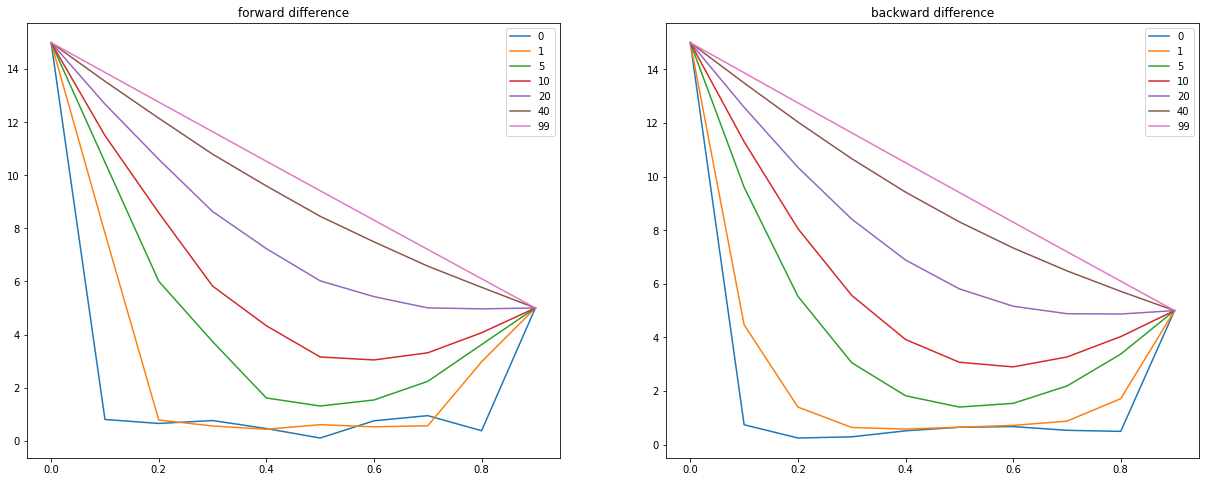

In [123]:
################################################################
# Finite difference method to solve 1-D flow equation
# Written by Shen Xianwen
# 2020.01.03 ver.1.0
# Verification:
# - Windows10 Home x64
# - Python     3.7.3
# - numpy     1.15.4
# - matplotlib 3.0.3
################################################################

import numpy as np
import warnings
from matplotlib import pyplot as plt


def water_flow_hom(Len, St, Left_Head, Right_Head, Trans, dx=0.1, dt=0.5, method='forward', times=100):
    """
    Len:the length of aquifer
    St:storativity
    Left_Head: left constant hydraulic head (m)
    Right_Head: left constant hydraulic head (m)
    Trans: transmissivity
    method: 'forward' or 'backward' difference approximation  --default:forward'
    dx: spatial resolution   --default:0.05
    dt: temporal resolution  --default:0.1
    times: Iteration times --default:100
    """
    x = np.arange(0, Len, dx)
    len_x = len(x)
    w = Trans / St * dt /dx /dx
    h = np.random.rand(len_x, 1)
    h[0] = Left_Head
    h[-1] = Right_Head

    if method == 'forward':
        output = forward_difference(w, len_x, h, times)
        return x, output
    elif method == 'backward':
        output = backward_difference(w, len_x, h, times)
        return x, output
    else:
        warnings.warn('please input right method', DeprecationWarning)


def forward_difference(w, nx, h, times):  # forward difference approximation
    W = (1 - 2 * w) * np.eye(nx, k=0) + w * np.eye(nx, k=1) + w * np.eye(nx, k=-1)  # matrix W in forward_difference
    W[0, 0] = W[-1, - 1] = 1
    W[0, 1] = W[-1, - 2] = 0
    output = [h]  # initialize output stack

    for i in range(times - 1):
        h = np.dot(W,output[-1])
        output.append(h)

    return output


def backward_difference(w, nx, h, times):  # backward difference approximation
    W = (1 + 2 * w) * np.eye(nx, k=0) - w * np.eye(nx, k=1) - w * np.eye(nx, k=-1)   # matrix W in forward_difference
    W[0, 0] = W[-1, - 1] = 1
    W[0, 1] = W[-1, - 2] = 0

    output = [h]  # initialize output stack

    for i in range(times - 1):
        h = np.dot(np.linalg.inv(W),output[-1])
        output.append(h)

    return output

if __name__=="__main__":
    '''parameters for model'''
    Len = 1
    hL = 15
    hR = 5
    S = 1
    T = 0.01

    '''running model'''
    timeID = np.array([0, 1, 5, 10, 20, 40, 99])
    x, result_forward = water_flow_hom(Len, S, hL, hR, T)
    x, result_backward = water_flow_hom(Len, S, hL, hR, T, method = 'backward')
    '''plot results'''
    plot_data1 = list(result_forward[i] for i in timeID)
    plot_data2 = list(result_backward[i] for i in timeID)
    fig = plt.figure()
    fig.set_size_inches(21, 8)
    ax1 = fig.add_subplot(1,2,1)
    for i in range(len(timeID)):
        p = ax1.plot(x, plot_data1[i])
        ax1.legend(timeID)
        
    ax2 = fig.add_subplot(1,2,2)
    for i in range(len(timeID)):
        ax2.plot(x,  plot_data2[i])
        ax2.legend(timeID)
  # ax2 = fig.add_subplot(1,2,2, adjustable='box', aspect=1.0)

   # ax1.scatter(x, y, s=80, c=z, cmap='jet')
    #ax1.set_title("Dataset")
    
    ax1.set_title("forward difference")
    
    ax2.set_title("backward difference")
    plt.show()


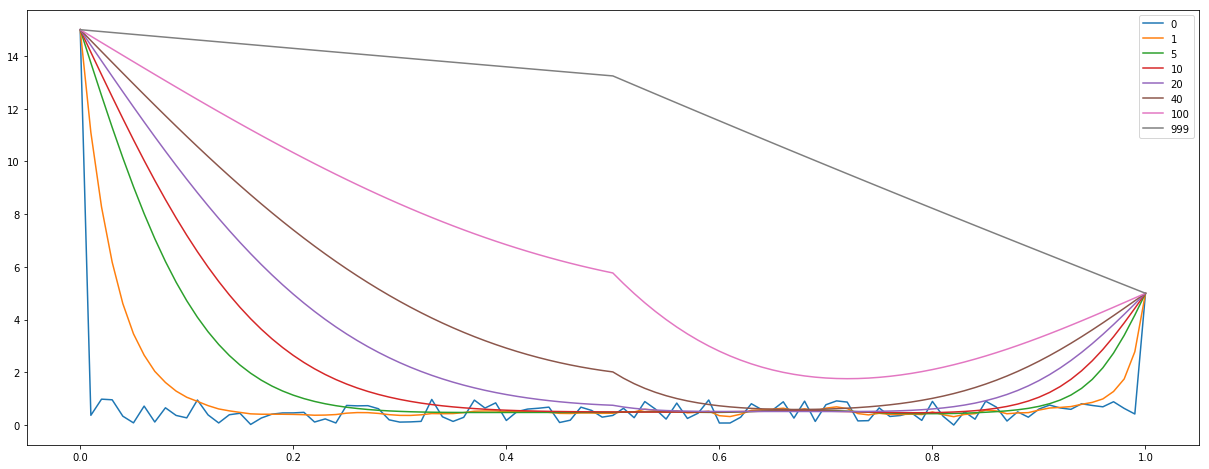

In [55]:
################################################################
# Finite difference method to solve 1-D flow equation
# Written by Shen Xianwen
# 2020.01.07 ver.1.0
# Verification:
# - Windows10 Home x64
# - Python     3.7.3
# - numpy     1.15.4
################################################################

import numpy as np
import warnings
from matplotlib import pyplot as plt
import numpy.matlib as mlt

def water_flow_hom(Len, St, Left_Head, Right_Head, Trans, dt=0.1, times=1000):
    """
    Len:the length of aquifer
    St:storativity
    Left_Head: left constant hydraulic head (m)
    Right_Head: left constant hydraulic head (m)
    Trans: transmissivity
    dt: temporal resolution  --default:0.1
    times: Iteration times --default:1000
    """
    nx = 50
    x = np.linspace(0, Len, nx*2+1)
    dx = x[1]-x[0]
    dt = 0.1;
    len_x = len(x)
    Ti = np.append(mlt.repmat(T[0],1,nx), mlt.repmat(T[1],1,nx))
   
    W = np.zeros([len_x, len_x])
    w = dt / dx / dx/ S
    h = np.random.rand(len_x, 1)
    
    for i in range(1, len_x-1):
        
        W[i, i+1] = -w * Ti[i]
        W[i, i] = 1 + w * (Ti[i] + Ti[i - 1]);
        W[i, i-1] = - w * Ti[i - 1];
        W[0, 0] = 1
        W[-1, -1] = 1
    
    h[0] = Left_Head
    h[-1] = Right_Head
    
    output = [h]  # initialize output stack

    for i in range(times - 1):
        h = np.dot(np.linalg.inv(W),output[-1])
        output.append(h)
        
    return x, output

if __name__=="__main__":
    '''parameters for model'''
    Len = 1
    hL = 15
    hR = 5
    S = 1
    T = [0.01, 0.002]

    '''running model'''
    timeID = np.array([0, 1, 5, 10, 20, 40, 100, 999])
    x, result = water_flow_hom(Len, S, hL, hR, T)
    
    '''plot results'''
    plot_data1 = list(result[i] for i in timeID)
   # plot_data2 = list(result_backward[i] for i in timeID)
    fig = plt.figure()
    fig.set_size_inches(21, 8)
    ax1 = fig.add_subplot(1,1,1)
    for i in range(len(timeID)):
        p = ax1.plot(x, plot_data1[i])
        ax1.legend(timeID)
        
    plt.show()
